In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# PLASTICA

In [ ]:
#prendo dati di LySO e fondo lyso
#spiego nome: sodio_lyso_1cm_plastica
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

Text(0.5, 1.0, 'Sodio con plastica BGO')

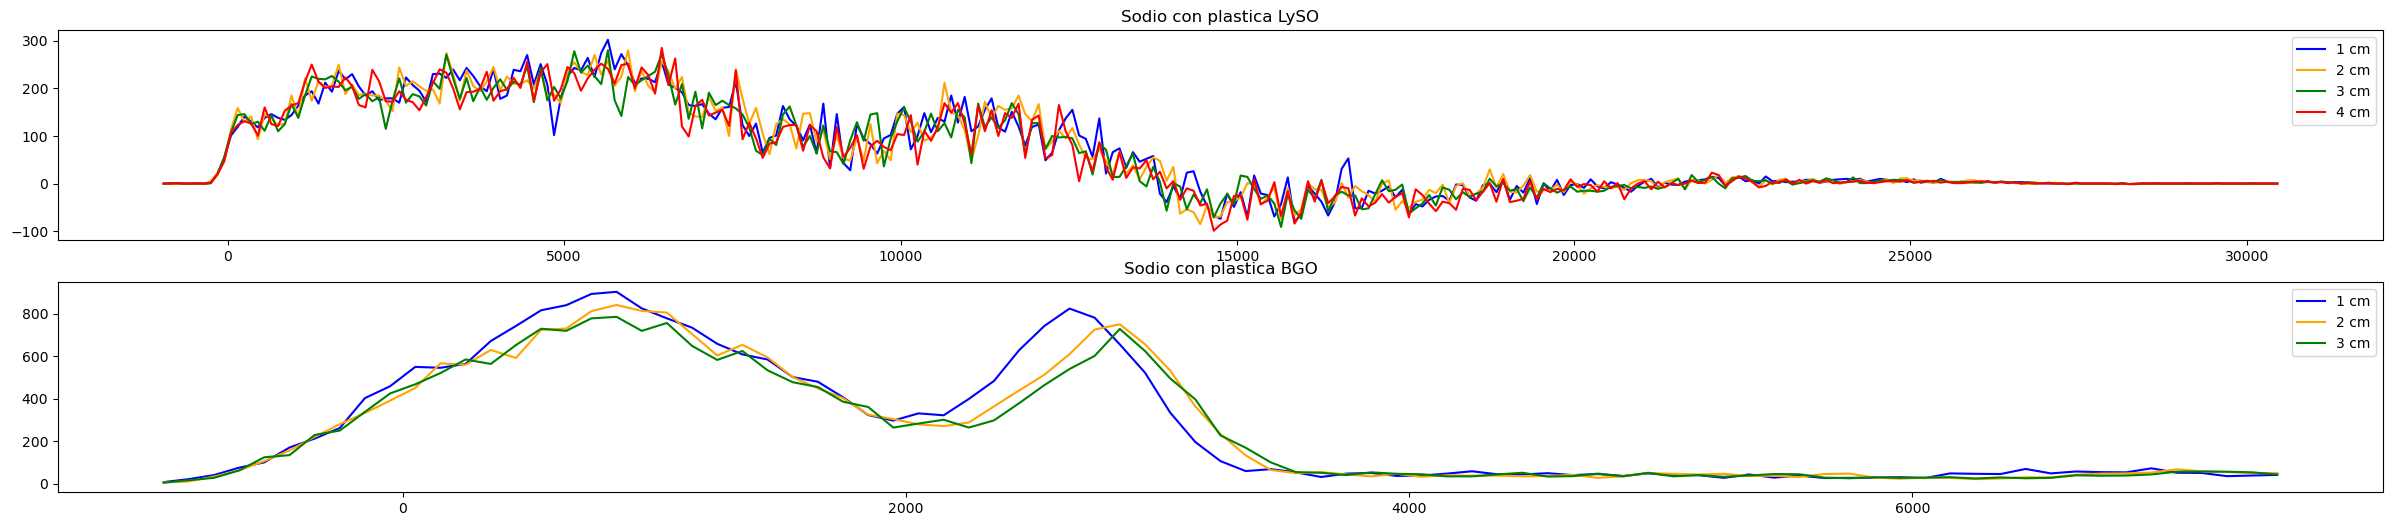

In [ ]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

# Alluminio

Text(0.5, 1.0, 'Sodio con alluminio LySO')

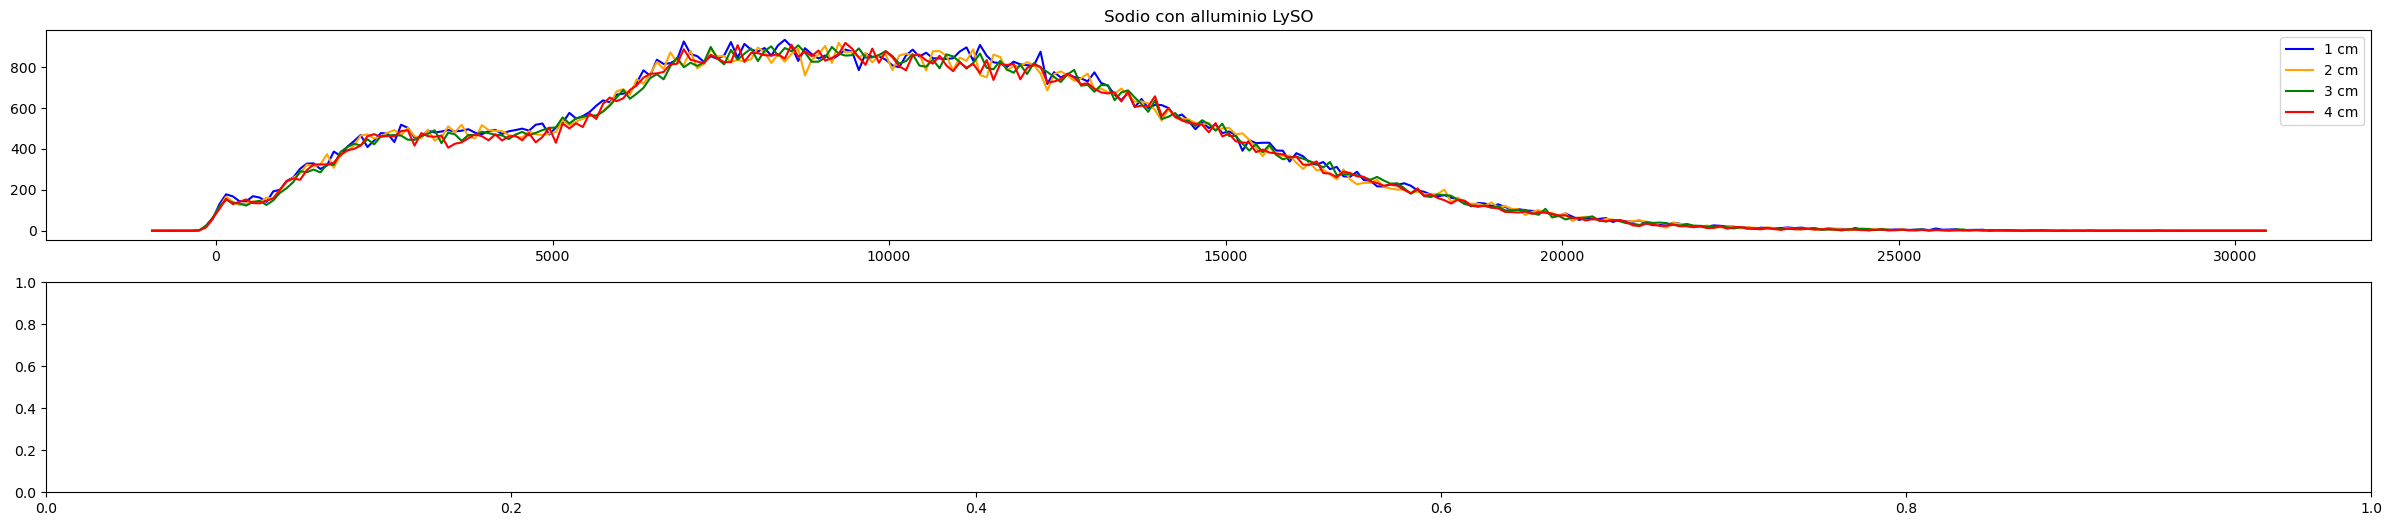

In [10]:
#spiego nome: sodio_lyso_1cm_alluminio
Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')

Text(0.5, 1.0, 'Sodio con alluminio LySO senza fondo')

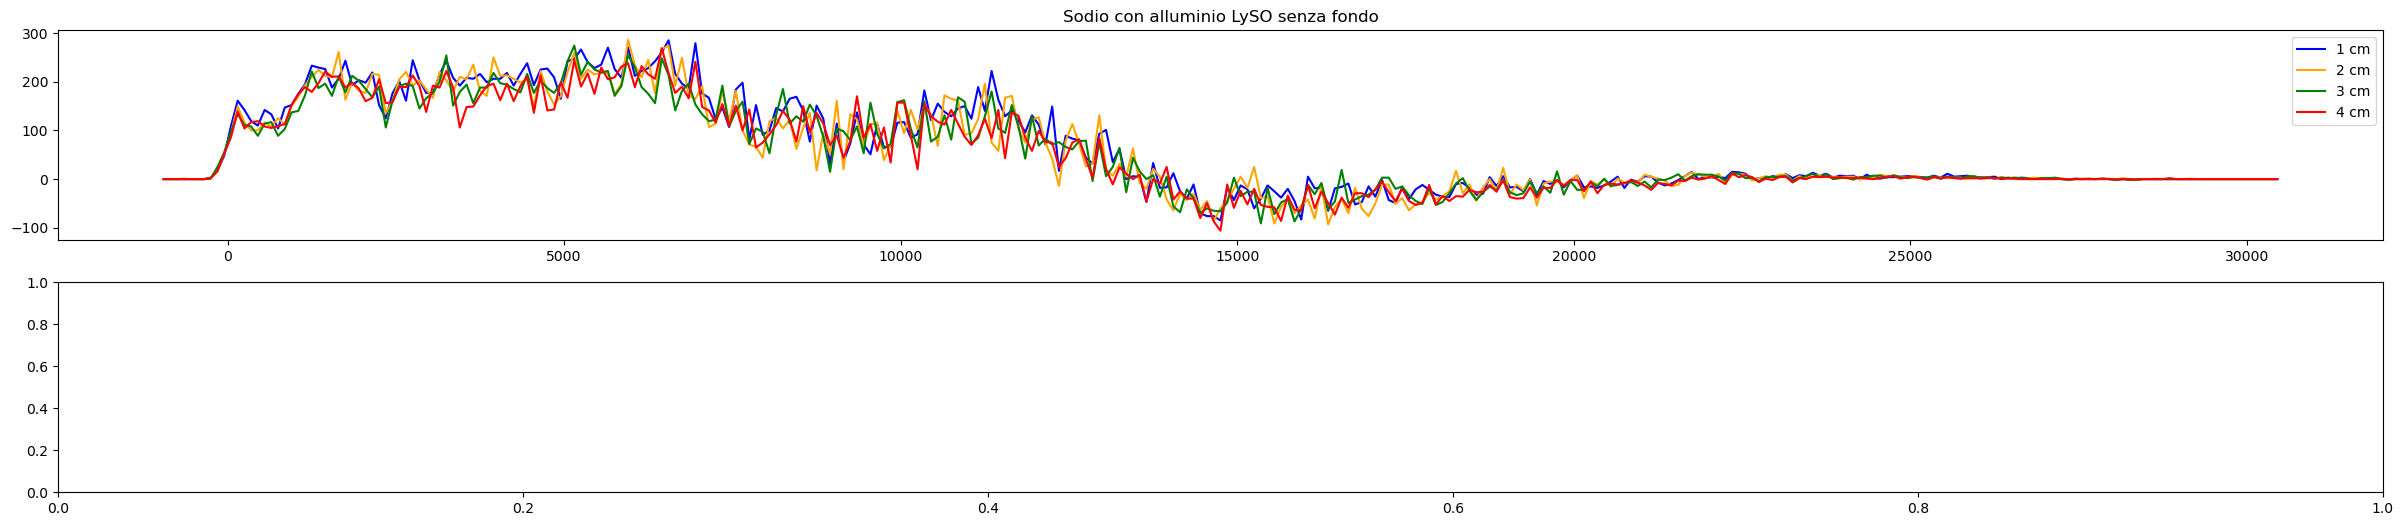

In [ ]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!